Note: For bert-as-service, I used max_seq_len 50

# Import necessary libraries

In [1]:
import time
import matplotlib.pyplot as plt
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
from bert_serving.client import BertClient
bc = BertClient()

C:\Users\Savannah\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Savannah\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Savannah\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Savannah\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWa

# Set example sentences

In [2]:
sentences = [
    "as they rounded a bend in the path that ran beside the river, lara recognized the silhouette of a fig tree atop a nearby hill.",
    "the weather was hot and the days were long.",
    "the fig tree was in full leaf, but not yet bearing fruit.",
    "soon lara spotted other landmarks—an outcropping of limestone beside the path that had a silhouette like a man’s face, a marshy spot beside the river where the waterfowl were easily startled, a tall tree that looked like a man with his arms upraised.",
    "they were drawing near to the place where there was an island in the river.",
    "the island was a good spot to make camp.",
    "they would sleep on the island tonight.",
    "lara had been back and forth along the river path many times in her short life.",
    "her people had not created the path—it had always been there, like the river—but their deerskin-shod feet and the wooden wheels of their handcarts kept the path well worn.",
    "lara’s people were salt traders, and their livelihood took them on a continual journey.",
    "at the mouth of the river, the little group of half a dozen intermingled families gathered salt from the great salt beds beside the sea.",
    "they groomed and sifted the salt and loaded it into handcarts.",
    "when the carts were full, most of the group would stay behind, taking shelter amid rocks and simple lean-tos, while a band of fifteen or so of the heartier members set out on the path that ran alongside the river.",
    "with their precious cargo of salt, the travelers crossed the coastal lowlands and traveled toward the mountains.",
    "but lara’s people never reached the mountaintops; they traveled only as far as the foothills.",
    "many people lived in the forests and grassy meadows of the foothills, gathered in small villages.",
    "in return for salt, these people would give lara’s people dried meat, animal skins, cloth spun from wool, clay pots, needles and scraping tools carved from bone, and little toys made of wood.",
    "their bartering done, lara and her people would travel back down the river path to the sea.",
    "the cycle would begin again.",
    "it had always been like this.",
    "lara knew no other life.",
    "she traveled back and forth, up and down the river path.",
    "no single place was home.",
    "she liked the seaside, where there was always fish to eat, and the gentle lapping of the waves lulled her to sleep at night.",
    "she was less fond of the foothills, where the path grew steep, the nights could be cold, and views of great distances made her dizzy.",
    "she felt uneasy in the villages, and was often shy around strangers.",
    "the path itself was where she felt most at home.",
    "she loved the smell of the river on a hot day, and the croaking of frogs at night.",
    "vines grew amid the lush foliage along the river, with berries that were good to eat.",
    "even on the hottest day, sundown brought a cool breeze off the water, which sighed and sang amid the reeds and tall grasses.",
    "of all the places along the path, the area they were approaching, with the island in the river, was lara’s favorite.",
    "the terrain along this stretch of the river was mostly flat, but in the immediate vicinity of the island, the land on the sunrise side was like a rumpled cloth, with hills and ridges and valleys.",
    "among lara’s people, there was a wooden baby’s crib, suitable for strapping to a cart, that had been passed down for generations.",
    "the island was shaped like that crib, longer than it was wide and pointed at the upriver end, where the flow had eroded both banks.",
    "the island was like a crib, and the group of hills on the sunrise side of the river were like old women mantled in heavy cloaks gathered to have a look at the baby in the crib—that was how lara’s father had once described the lay of the land.",
    "larth spoke like that all the time, conjuring images of giants and monsters in the landscape.",
    "he could perceive the spirits, called numina, that dwelled in rocks and trees.",
    "sometimes he could speak to them and hear what they had to say.",
    "the river was his oldest friend and told him where the fishing would be best.",
    "from whispers in the wind he could foretell the next day’s weather.",
    "because of such skills, larth was the leader of the group.",
    "we’re close to the island, aren’t we, papa? said lara.",
    "how did you know?",
    "the hills.",
    "first we start to see the hills, off to the right.",
    "the hills grow bigger.",
    "and just before we come to the island, we can see the silhouette of that fig tree up there, along the crest of that hill.",
    "good girl! said larth, proud of his daughter’s memory and powers of observation.",
    "he was a strong, handsome man with flecks of gray in his black beard.",
    "his wife had borne several children, but all had died very young except lara, the last, whom his wife had died bearing."
]

# Get Timings

In [5]:
def get_timing(s):
    time_total_BAS = 0
    time_total_SB = 0
    for i in range(100):
        # Time bert-as-service
        t0 = time.process_time() # or .perf_counter() to include time sleeping
        bc.encode([s])
        t1 = time.process_time()
        time_total_BAS += t1-t0
        # Time Sentence-BERT
        t0 = time.process_time()
        model.encode([s])
        t1 = time.process_time()
        time_total_SB += t1-t0
    print(s)
    return len(s), len(s.split()), len(tokenizer.tokenize("[CLS] " + s + " [SEP]")), time_total_BAS/100, time_total_SB/100

timings = [get_timing(s) for s in sentences]

as they rounded a bend in the path that ran beside the river, lara recognized the silhouette of a fig tree atop a nearby hill.
the weather was hot and the days were long.
the fig tree was in full leaf, but not yet bearing fruit.
soon lara spotted other landmarks—an outcropping of limestone beside the path that had a silhouette like a man’s face, a marshy spot beside the river where the waterfowl were easily startled, a tall tree that looked like a man with his arms upraised.
they were drawing near to the place where there was an island in the river.
the island was a good spot to make camp.
they would sleep on the island tonight.
lara had been back and forth along the river path many times in her short life.
her people had not created the path—it had always been there, like the river—but their deerskin-shod feet and the wooden wheels of their handcarts kept the path well worn.
lara’s people were salt traders, and their livelihood took them on a continual journey.
at the mouth of the riv

# Plot results

In [7]:
num_char = [i[0] for i in timings]
num_word = [i[1] for i in timings]
num_token = [i[2] for i in timings]
avg_time_BAS = [i[3] for i in timings]
avg_time_SB = [i[4] for i in timings]

Text(0.5, 1.0, 'Time to Embed Sentence Using bert-as-service vs. Number of Characters')

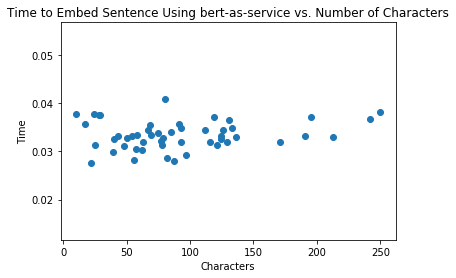

In [8]:
plt.scatter(num_char, avg_time_BAS)
plt.xlabel('Characters')
plt.ylabel('Time')
plt.title('Time to Embed Sentence Using bert-as-service vs. Number of Characters')

Text(0.5, 1.0, 'Time to Embed Sentence Using Sentence-BERT vs. Number of Characters')

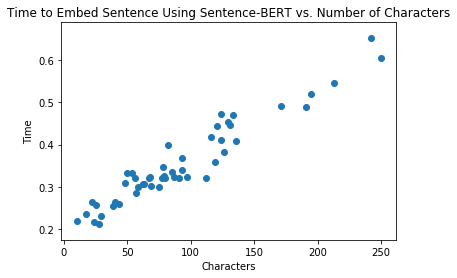

In [9]:
plt.scatter(num_char, avg_time_SB)
plt.xlabel('Characters')
plt.ylabel('Time')
plt.title('Time to Embed Sentence Using Sentence-BERT vs. Number of Characters')

Text(0.5, 1.0, 'Time to Embed Sentence Using bert-as-service vs. Number of Words')

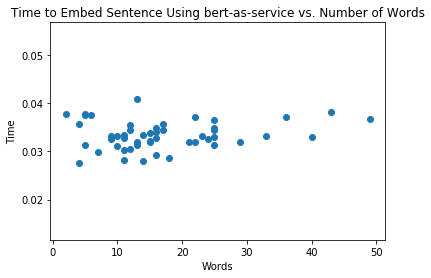

In [10]:
plt.scatter(num_word, avg_time_BAS)
plt.xlabel('Words')
plt.ylabel('Time')
plt.title('Time to Embed Sentence Using bert-as-service vs. Number of Words')

Text(0.5, 1.0, 'Time to Embed Sentence Using Sentence-BERT vs. Number of Words')

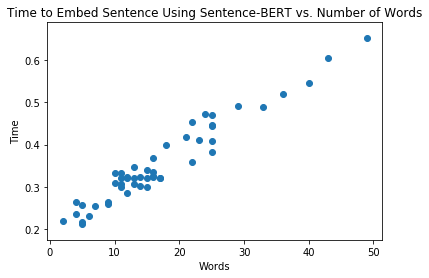

In [11]:
plt.scatter(num_word, avg_time_SB)
plt.xlabel('Words')
plt.ylabel('Time')
plt.title('Time to Embed Sentence Using Sentence-BERT vs. Number of Words')

Text(0.5, 1.0, 'Time to Embed Sentence Using bert-as-service vs. Number of Tokens')

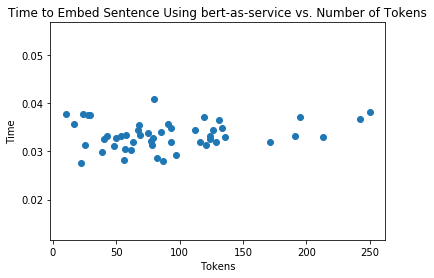

In [12]:
plt.scatter(num_char, avg_time_BAS)
plt.xlabel('Tokens')
plt.ylabel('Time')
plt.title('Time to Embed Sentence Using bert-as-service vs. Number of Tokens')

Text(0.5, 1.0, 'Time to Embed Sentence Using Sentence-BERT vs. Number of Tokens')

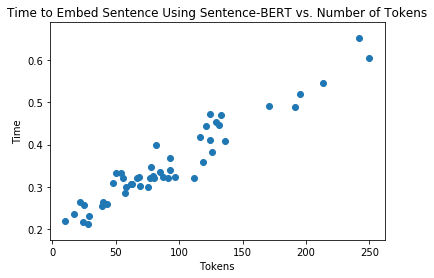

In [13]:
plt.scatter(num_char, avg_time_SB)
plt.xlabel('Tokens')
plt.ylabel('Time')
plt.title('Time to Embed Sentence Using Sentence-BERT vs. Number of Tokens')